### Minería de datos descriptiva

En esta práctica vamos a trabajar con la información extraída de un portal de valoración de películas. En concreto se ha extraído información de 943 usuarios del portal, 1682 películas y 100.000 valoraciones realizadas por los usuarios a las películas. La información de cada tipo de entidad está almacenada en su correspondiente documento .csv:
* u.user: contiene la información de los 943 usuarios
* u.item: contiene la información de las 1.682 películas
* u.data: contiene la información de las 100.000 valoraciones de los usuarios a las películas

En primer lugar se importa una librería para realizar las comparaciones entre los resultados obtenidos y los que se deberían obtener a lo largo de la práctica. De este modo podéis saber en muchos apartados si el resultado es correcto.

In [2]:
from test_helper import Test

Importa los paquetes numpy, pandas y matplotlib.pyplot como np, pd y plt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Lee y obtén un DataFrame de cada una de las entidades
* De los usuarios debes leer solamente las columnas: user_id, age, sex, occupation y zip_code. Utiliza como separador: '|'
* De las películas debes leer solamente las columnas: movie_id, title, release_date, video_release_date e imdb_url. Utiliza como separador: '|'. Como este fichero contiene más de esos campos se debe especificar que éstos son los 5 primeros por lo que hay que incluir en la llamada a read_csv la opción usecols=range(5)
* De las valoraciones debes leer solamente las columnas: user_id, movie_id, rating y unix_timestamp. Utiliza como separador: '\t'

En todos los casos debéis utilizar como codificación latin-1.

In [4]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols, encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols, encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin-1')

In [5]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Muestra por pantalla el número de usuarios masculinos (sex=='M') y femeninos (sex=='F'). ¿Está balanceado? Para contar el número de elementos de una columna se debe utilizar la función count de Pandas.

In [6]:
numUsuariosMasculinos = users[users.sex == 'M']['sex'].count()
numUsuariosFemeninos = users[users.sex == 'F']['sex'].count()


In [7]:
Test.assertEquals(numUsuariosMasculinos, 670, 'Número de usuarios masculinos incorreto')
Test.assertEquals(numUsuariosFemeninos, 273, 'Número de usuarios femeninos incorreto')

1 test passed.
1 test passed.


Obtén una descripción completa (función *describe*) de la columna rating de ratings. ¿Qué tipo de valoración se hacen en IMDB? Sabiendo que la mejor valoración es 5 y la peor 1, ¿Hay más comentarios positivos o negativos? 

In [8]:
print(ratings.head())
print(ratings['rating'].describe())

#un mean de 3.52 esta por encima de la media que seria 3 {1,5} siendo los intervalos, el std es la desviacion estandar, 
# el cual quiere decir que varia un 1.12 para arriba y para abajo de la media, el rating minimo de 1, el rating maximo 5
# el 25% de las personas dan un rating que se encuentra en 3 o menos, el 50% en 4 o menosy el 75% se encuentra en 4 o menos tambien.

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596
count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


¿Has observado que podemos establecer una relación entre los 3 dataframes? Vamos a verlo: el primero (users) contiene la información de los usuarios que hacen los reviews. Parece ser que el user_id sirve para identificar a cada usuario unívocamente; El segundo (movies) contiene la información de las películas que están siendo valoradas. Parece ser que movie_id sirve para identificar unívocamente cada una de las películas; El tercero (ratings) contiene, por cada fila, el identificador del usuario, el identificador de la película y la valoración numérica que dicho usuario ha otorgado a la correspondiente película. Está claro que podemos establecer una relación users-ratings-movies.

Para explotar la información de las 3 entidades se debe generar un DataFrame con la unión de la información de los 3 existentes. LLama al DataFrame generado PRU (películas rating usuarios). Muestra las tres primeras entradas del DataFrame generado.

Recordar que para realizar la unión se debe utilizar la función merge de los DataFrames que equivale al join de SQL. Realizad la unión en el orden mencionado en el párrafo anterior.

In [9]:
ratings_movies = pd.merge(movies, ratings)
PRU = pd.merge(ratings_movies, users)


In [10]:
Test.assertEquals(list(PRU['movie_id'].tail(3)), [1680, 1681, 1682], 'Unión incorrecta')

1 test passed.


A partir del DataFrame *PRU*, obten por cada película (id y título) el número de veces que ha sido valorada y ordena las películas de mayor a  menor según el número de valoraciones. Guarda las 25 películas con un mayor número de valoraciones en una variable llamada most_rated y muestrala por pantalla.

NOTA: se deben utilizar las funciones groupby, count y sort_values.
* Para el método sort_values asignad el tipo de algoritmo de ordenación a *mergesort (kind='mergesort')*

NOTA 1: para quedaros con los 25 primeros no se debe utilizar la función *head(25)*.

In [11]:
# most_rated =  <RELLENAR>
print(PRU.columns)
obj = PRU.groupby(['movie_id','title'])

obj2 = obj['rating'].count()
# Usamos slicing [:25] que es más eficiente que .head(25) en algunos casos 
# y cumple con la restricción de no usar .head()
#most_rated = obj2.sort_values(ascending=False, kind='mergesort')[:25]
most_rated = obj2.nlargest(25) #mas eficiente

print(most_rated)

Index(['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
       'user_id', 'rating', 'unix_timestamp', 'age', 'sex', 'occupation',
       'zip_code'],
      dtype='object')
movie_id  title                                       
50        Star Wars (1977)                                583
258       Contact (1997)                                  509
100       Fargo (1996)                                    508
181       Return of the Jedi (1983)                       507
294       Liar Liar (1997)                                485
286       English Patient, The (1996)                     481
288       Scream (1996)                                   478
1         Toy Story (1995)                                452
300       Air Force One (1997)                            431
121       Independence Day (ID4) (1996)                   429
174       Raiders of the Lost Ark (1981)                  420
127       Godfather, The (1972)                           413
56     

In [12]:
Test.assertEquals(list(most_rated.index.get_level_values(0)), [50, 258, 100, 181, 294, 286, 288, 1, 300, 121, 174, 127, 56, 7, 98, 237, 117, 172, 222, 204, 313, 405, 79, 210, 151], 'Peliculas más valoradas incorrectas')

1 test passed.


A partir del DataFrame *PRU*, crea un DataFrame llamado movie_stats en el que se calcule por cada película (id y título) el número de veces que haya sido valorada y la media de sus valoraciones. Las valoraciones están almacenadas en el campo llamado rating. Ordena (usando mergesort) y almacena el dataFrame de mayor a menor por la media de las valoraciones. 

Muestra las 5 con mayor media de sus valoraciones.

NOTAS:
* Debéis utilizar las funciones groupby, agg y sort_values
* Para realizar la cuenta y la media de las valoraciones debéis pasar los strigns size y mean.

In [13]:
obj = PRU.groupby(['movie_id','title'])
movie_stats = obj['rating'].agg(['count','mean'])

movie_stats = movie_stats.sort_values(by='mean',ascending=False, kind="mergesort")

print(movie_stats)

                                                     count  mean
movie_id title                                                  
814      Great Day in Harlem, A (1994)                   1   5.0
1122     They Made Me a Criminal (1939)                  1   5.0
1189     Prefontaine (1997)                              3   5.0
1201     Marlene Dietrich: Shadow and Light (1996)       1   5.0
1293     Star Kid (1997)                                 3   5.0
...                                                    ...   ...
1654     Chairman of the Board (1998)                    1   1.0
1659     Getting Away With Murder (1996)                 1   1.0
1661     New Age, The (1994)                             1   1.0
1671     Further Gesture, A (1996)                       1   1.0
1678     Mat' i syn (1997)                               1   1.0

[1682 rows x 2 columns]


In [14]:
Test.assertEquals(list(movie_stats.head().index.get_level_values(0)), [814, 1122, 1189, 1201, 1293], 'Peliculas incorrectas')

1 test passed.


Si observamos los resultados de la consulta anterior, podemos ver que las películas de mayor media son raras en el sentido de que han sido valoradas muy pocas veces. 

Por ello se debe crear un nuevo DataFrame (a partir del DataFrame movie_stats), llamado movie_stats_top15, que contenga las 15 películas con mayor media de valoraciones que hayan sido valoradas al menos 100 veces. Muestralo por pantalla.

NOTA:
* Debéis utilizar el DataFrame creado en la celda anterior y recordar que la función agg devuelve multi-índices
* Debéis utilizar la función sort_values usando mergesort

In [15]:
# Array (Serie) de booleanos de tantas posiciones como películas
    # en cada posición se pone True si tiene 100 o más valoraciones y False en caso contrario
atleast_100 =  (movie_stats['count'] >= 100)
# Utilizar el array anterior para seleccionar las 15 películas con mayor valoración media
movie_stats_top15 =  movie_stats[atleast_100][:15]

print(movie_stats_top15)

                                                 count      mean
movie_id title                                                  
408      Close Shave, A (1995)                     112  4.491071
318      Schindler's List (1993)                   298  4.466443
169      Wrong Trousers, The (1993)                118  4.466102
483      Casablanca (1942)                         243  4.456790
64       Shawshank Redemption, The (1994)          283  4.445230
603      Rear Window (1954)                        209  4.387560
12       Usual Suspects, The (1995)                267  4.385768
50       Star Wars (1977)                          583  4.358491
178      12 Angry Men (1957)                       125  4.344000
134      Citizen Kane (1941)                       198  4.292929
427      To Kill a Mockingbird (1962)              219  4.292237
357      One Flew Over the Cuckoo's Nest (1975)    264  4.291667
98       Silence of the Lambs, The (1991)          390  4.289744
480      North by Northwe

In [16]:
Test.assertEquals(list(movie_stats_top15.index.get_level_values(0)), [408,318,169,483,64,603,12,50,178,134,427,357,98,480,127], 'Peliculas incorrectas')

1 test passed.


Como vemos, estas películas son muy conocidas a diferencia de las anteriores.

Ahora se desea obtener toda la información (está en el DataFrame PRU) de las películas correspondientes a las 50 películas con un mayor número de valoraciones.

Para ello, se debe hacer lo siguiente:
* Crear un objeto de Series a partir del DataFrame PRU, llamado most_50, cuyo índice sean los identificadores (movie_id) y los valores sean el número de valoraciones de las 50 películas que tengan un mayor número de valoraciones. 
    * Recordad que groupby devuelve un objeto (Serie o DataFrame) cuyos índices son los valores por los que se ha realizado la agrupación.
* Crear un DataFrame a partir del DataFrame PRU, llamado top50pelis, que contenta la información de las películas correspondientes a las obtenidas en el apartado anterior. Para ello, se deben comparar los identificadores de las películas (índices) de la Serie creada con los del DataFrame PRU.
* Mostrar los 5 primeros registros tanto de most_50 como de top50pelis por pantalla.

NOTAS: 
* Para crear la serie most_50 se deben utilizar las funciones groupby, count y sort_values.
* Para crear el DataFrame top50pelis debéis conocer que
    * La lista de índices correspondientes a una Serie se obtienen con la función index, nombreSerie.index
    * La función *isin* chequea si un elemento de una lista está en otra (o en una Series) y devuelve un valor Booleano (True si está y False en caso contrario).

In [17]:
most_50 = PRU.groupby('movie_id')['rating'].count().sort_values(ascending=False, kind='mergesort')[:50]
top50pelis =  PRU[PRU['movie_id'].isin(most_50.index)]
print(top50pelis)

       movie_id              title release_date  video_release_date  \
0             1   Toy Story (1995)  01-Jan-1995                 NaN   
1             1   Toy Story (1995)  01-Jan-1995                 NaN   
2             1   Toy Story (1995)  01-Jan-1995                 NaN   
3             1   Toy Story (1995)  01-Jan-1995                 NaN   
4             1   Toy Story (1995)  01-Jan-1995                 NaN   
...         ...                ...          ...                 ...   
83266       748  Saint, The (1997)  14-Mar-1997                 NaN   
83267       748  Saint, The (1997)  14-Mar-1997                 NaN   
83268       748  Saint, The (1997)  14-Mar-1997                 NaN   
83269       748  Saint, The (1997)  14-Mar-1997                 NaN   
83270       748  Saint, The (1997)  14-Mar-1997                 NaN   

                                                imdb_url  user_id  rating  \
0      http://us.imdb.com/M/title-exact?Toy%20Story%2...      308     

In [22]:
Test.assertEquals(list(top50pelis.head(10).user_id), [308, 287, 148, 280, 66, 5, 109, 181, 95, 268], 'Información incorrecta')

1 test passed.


Se desea analizar la edad de los usuarios que realizan las valoraciones en el portal. Para ello se debe mostrar en un gráfico de barras en forma de histograma que muestre la distribución de la edad de los usuarios. 

Para realizar la gráfica es necesario utilizar la función plot de los DataFrames con la función histograma (hist) especificando el número de grupos que deseas mostrar (bins=numGrupos). Para añadir información al gráfico se debe añadir un título y el nombre de los ejes  mediante las funciones/campos correspondientes de matplotlib.pyplot: abrir primero una figura de matplotlib.pyplot y luego especificar el contenido de los campos title, xlabel y ylabel.

Realiza el gráfica mostrando 30 grupos de edad diferentes.

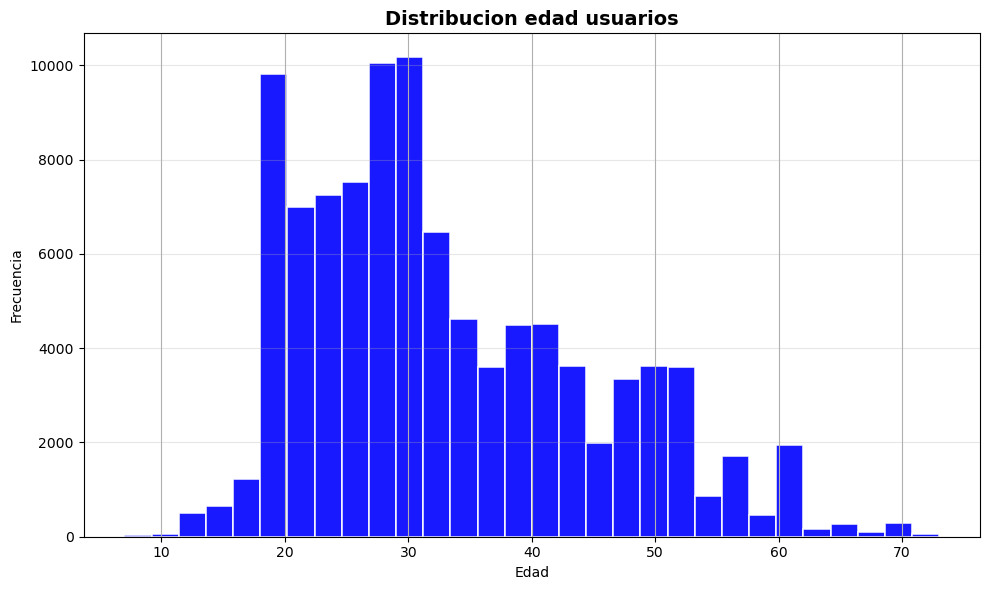

In [41]:
plt.figure(figsize=(10,6))
PRU['age'].hist(bins=30,color='blue',alpha=0.9, edgecolor='white', linewidth=1.2)
plt.title('Distribucion edad usuarios', fontsize=14,fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Se desea profundizar en el análisis de la influencia de la edad en las valoraciones realizadas. Para ello el director del portal desea crear grupos de usuarios por edad (grupos de 10 años). Para ello se debe utilizar la función *cut* ofrecida por pandas (información en http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) aplicando el siguiente proceso:
* Crear nombres para los grupos de edad generados ya que vamos a transformar una variable numérica (edad) en categórica
    * groupNames = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
* Utilizar la función *cut* para realizar la transformación de los valores, la llamada a la función y los parámetros que son necesarios para esta práctica son los siguientes:
    * pandas.cut(x, bins, right=True, labels=None)
        * x: los valores a transformar, es decir, la variable edad
        * bins: los valores por los que realizar la transformación: 0, 10, 20, 30, 40, 50, 60, 70 y 80.
        * right: booleano que si está a True indica que se cogen los valores entre el bin izquierdo (sin incluir) y el derecho (incluido), es decir, con los bins anteriores se realizarían los grupos de edad (0, 10], (10, 20], (20, 30], etc...Si está a False no se coge el bin derecho y se coge el izquierdo: [0, 10), [10, 20), [20, 30), etc... Asignar este campo a False.
        * labels: los nombres de los nuevos valores: los que acabamos de definir en el paso anterior
    * La función cut devuelve una Serie con valores categóricos si el parámetro labels tiene valor e integers si no tiene valor. Guardar el resultado en una variable auxiliar.
* Crear un nuevo campo, llamado *age_group*, en el DataFrame PRU en el que se almacene el resultado de la función cut.

In [46]:
groupNames =  ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
aux = [0,10,20,30,40,50,60,70,80]
PRU['age_group'] =  pd.cut(PRU['age'],bins=aux,right=False,labels=groupNames)

print(PRU['age_group'])

0        60-69
1        20-29
2        30-39
3        30-39
4        20-29
         ...  
99995    10-19
99996    10-19
99997    10-19
99998    20-29
99999    20-29
Name: age_group, Length: 100000, dtype: category
Categories (8, object): ['0-9' < '10-19' < '20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']


In [45]:
Test.assertEquals(list(PRU['age_group'].head(5)), ['60-69', '20-29', '30-39', '30-39', '20-29'], 'Grupos creados incorrectamente')

1 test passed.


Ahora se desea obtener el número de valoraciones que han hecho usuarios de cada grupo de edad así como sus valoraciones medias. De esta forma podremos saber si existen diferencias en las valoraciones entre los distintos grupos de edad.

Para ello se debe crear un DataFrame a partir del DataFrame inicial PRU, llamado valoracionesPorGrupoEdad, en el que se obtenga para cada grupo de edad de los usuarios el número de valoraciones realizada así como la media de las mismas. Muestralo por pantalla.

NOTA:
* Debéis utilizar las funciones groupby (asignando observed a True, para que se tengan en cuenta solamente las categorías presentes en los datos), agg así como los strings size y mean.

In [63]:
valoracionesPorGrupoEdad =  PRU.groupby('age_group', observed=True)
valoracionesPorGrupoEdad = valoracionesPorGrupoEdad[['rating']].agg(['size','mean'])

print(valoracionesPorGrupoEdad)


          rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746


In [64]:
Test.assertEquals(list(valoracionesPorGrupoEdad[('rating','size')]), [43,8181,39535,25696,15021,8704,2623,197], 'Estadisticas creadas incorrectamente')

1 test passed.


El propietario del portal quiere responder a la siguiente pregunta: ¿En qué películas de las 50 con mayor número de valoraciones están más en desacuerdo los hombres y las mujeres? 

Para resolverla se debe realizar el siguiente proceso:
* Crear una pivot table, llamada pivoted, sobre el DataFrame guardado en top50pelis, con los valores agrupados por el título de cada película (index), calculando la media de las valoraciones (campo rating) en función del sexo (campo sex).
* Añadir una columna llamada diff a la pivot table resultante (pivoted) que sea la diferencia entre las valoraciones medias realizadas por mujeres y hombres (en ese orden). 
    * Para añadir una columna a la pivot table se debe poner el nombre de la pivot table y entre corchetes el nombre del nuevo campo. Luego se guarda el resultado de la operación.
* Ordena de mayor a menor el DataFrame de acuerdo a dicha diferencia con la instrucción sort_values (usando mergesort).
* Muestra una gráfica de barras horizontales en la que se muestren las diferencias entre las valoraciones de hombres y mujeres para las películas en estudio.

NOTA:
* Para crear un gráfico de barras horizontales utilizar la función plot especificando el tipo de gráfico y el tamaño del mismo (plot(kind='barh', figsize=[9, 15]))

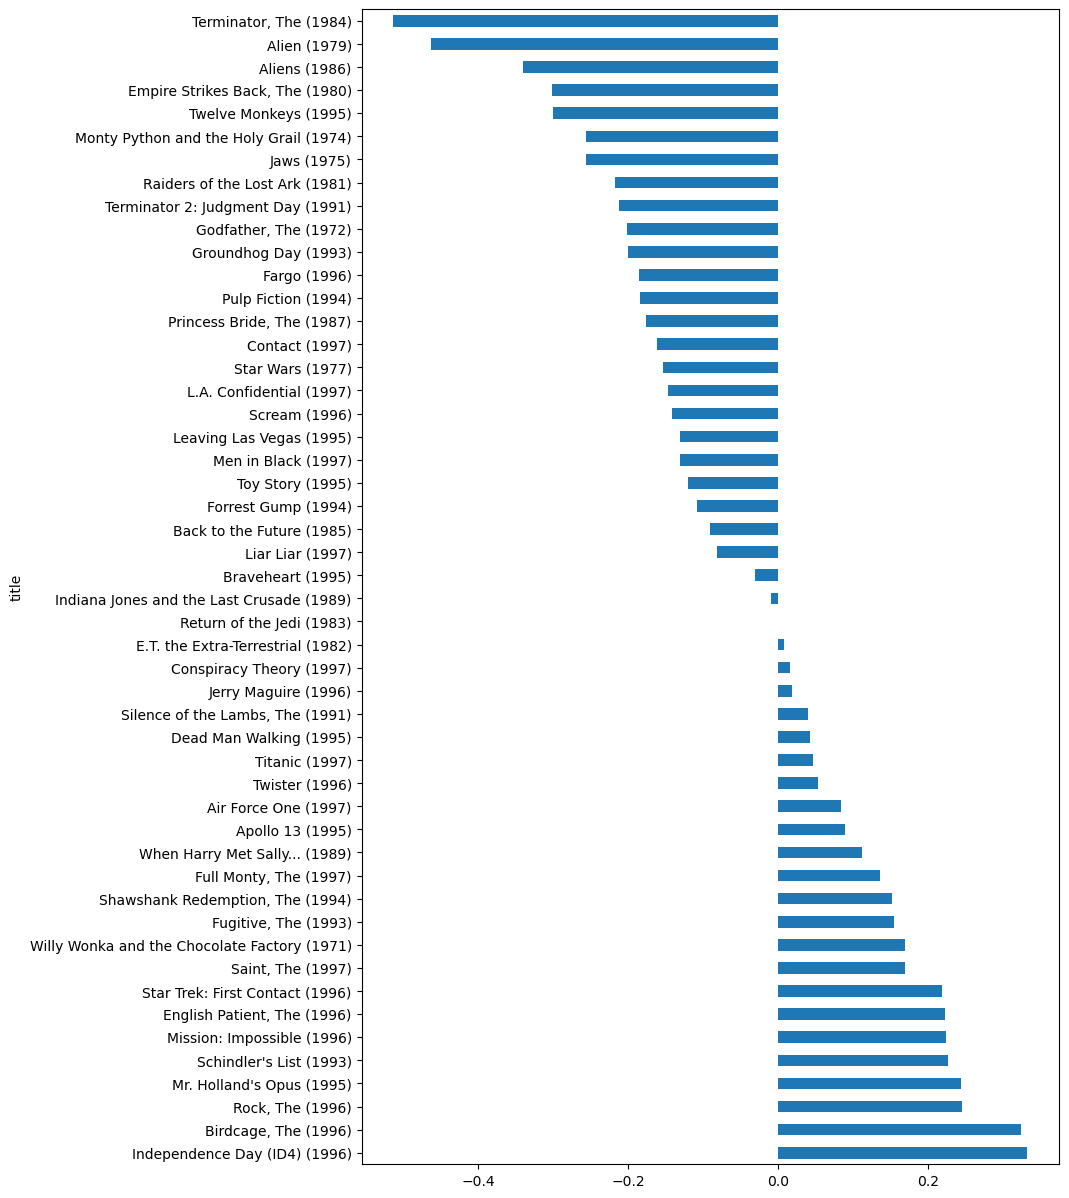

In [ ]:
pivoted = top50pelis.pivot_table(index='title', values='rating', columns='sex', aggfunc='mean')
pivoted['diff'] = pivoted['F'] - pivoted['M']
pivoted = pivoted.sort_values(by='diff', ascending=False, kind='mergesort')
pivoted['diff'].plot(kind='barh', figsize=[9, 15])
plt.show()

In [66]:
Test.assertEquals(list(map(lambda x: round(x, 2), pivoted['diff'][:10].values)),[0.33, 0.32, 0.24, 0.24, 0.23, 0.22, 0.22, 0.22, 0.17, 0.17], 'Pivot table mal creada')

1 test passed.
